<a href="https://colab.research.google.com/github/hongqin/Use-R-in-CoLab/blob/master/test_EpiEstim_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test EpiEstim

https://cran.r-project.org/web/packages/EpiEstim/index.html

https://cran.r-project.org/web/packages/EpiEstim/vignettes/demo.html


In [18]:
install.packages("EpiEstim", lib='/content')
install.packages("incidence", lib='/content')

library(EpiEstim, lib.loc='/content')
library(incidence, lib.loc='/content')

library(ggplot2)

In [9]:
data(Flu2009)

In [14]:
## incidence:
head(Flu2009$incidence)

,dates,I
,<date>,<dbl>
1,2009-04-27,1
2,2009-04-28,1
3,2009-04-29,0
4,2009-04-30,2
5,2009-05-01,5
6,2009-05-02,3


In [15]:
## serial interval (SI) distribution:
Flu2009$si_distr

[1] 0.000 0.233 0.359 0.198 0.103 0.053 0.027 0.014 0.007 0.003 0.002 0.001

In [16]:
## interval-ceonsored serial interval data:
## each line represents a transmission event, 
## EL/ER show the lower/upper bound of the symptoms onset date in the infector
## SL/SR show the same for the secondary case
## type has entries 0 corresponding to doubly interval-censored data
## (see Reich et al. Statist. Med. 2009).
head(Flu2009$si_data)


,EL,ER,SL,SR,type
,<int>,<int>,<int>,<int>,<dbl>
1,0,1,7,8,0
2,0,1,2,3,0
3,0,1,3,4,0
4,0,1,2,5,0
5,0,1,1,9,0
6,0,1,2,4,0


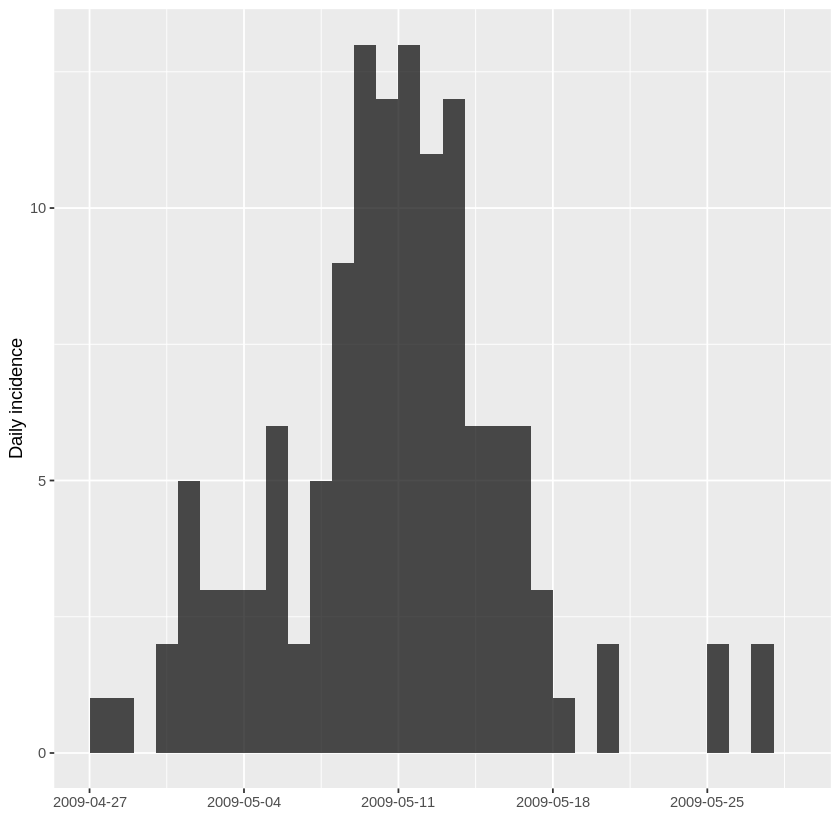

In [19]:
plot(as.incidence(Flu2009$incidence$I, dates = Flu2009$incidence$dates))

We can run estimate_R on the incidence data to estimate the reproduction number R. For this, we need to specify i) the time window(s) over which to estimate R and ii) information on the distribution of the serial interval.

For i), the default behavior is to estimate R over weekly sliding windows. This can be changed through the config$t_start and config$t_end arguments (see below, “Changing the time windows for estimation”). For ii), there are several options, specified in the method argument.

The simplest is the parametric_si method, where you only specify the mean and standard deviation of the SI.

# Estimating R on sliding weekly windows, with a parametric serial interval
In this example, we only specify the mean and standard deviation of the serial interval. In that case an offset gamma distribution is used for the serial interval. In the following example, we use the mean and standard deviation of the serial interval for flu from Ferguson et al., Nature, 2005:

In [20]:
res_parametric_si <- estimate_R(Flu2009$incidence, 
                                method="parametric_si",
                                config = make_config(list(
                                  mean_si = 2.6, 
                                  std_si = 1.5))
)

Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 



In [21]:
head(res_parametric_si$R)

,t_start,t_end,Mean(R),Std(R),Quantile.0.025(R),Quantile.0.05(R),Quantile.0.25(R),Median(R),Quantile.0.75(R),Quantile.0.95(R),Quantile.0.975(R)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,8,1.735798,0.4091314,1.0287437,1.121933,1.445198,1.703761,1.991520,2.458972,2.624781
2,3,9,1.749168,0.3647267,1.1088223,1.195480,1.491345,1.723884,1.979457,2.389121,2.533119
3,4,10,1.537058,0.3074116,0.9947030,1.068694,1.320090,1.516613,1.731761,2.075176,2.195540
4,5,11,1.431839,0.2705921,0.9514466,1.017661,1.241251,1.414830,1.603900,1.904047,2.008849
5,6,12,1.422725,0.2515046,0.9731426,1.035808,1.245996,1.407932,1.583340,1.860107,1.956336
6,7,13,1.635373,0.2523436,1.1786332,1.243590,1.458847,1.622413,1.797779,2.071372,2.165745


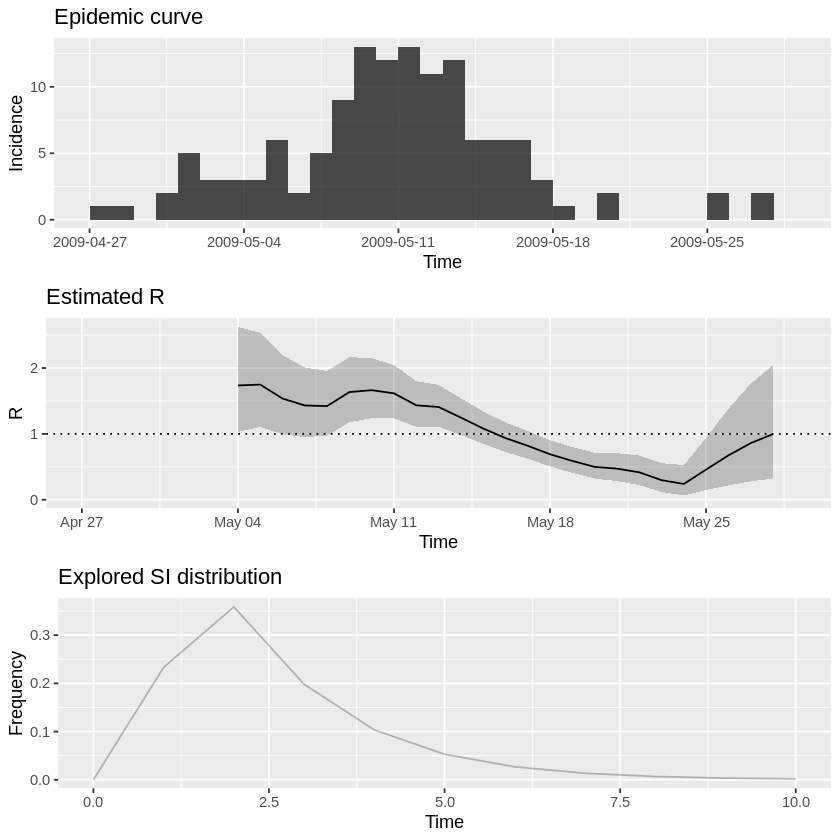

In [22]:
plot(res_parametric_si, legend = FALSE)